<a href="https://colab.research.google.com/github/Lucas-Souza-Santos/InteligenciaArtificialUFPE/blob/main/logicaFuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exemplo de aplicação de lógica neulosa(fuzzy)
Adaptado do trabalho disponível em [pythonhosted.org](https://)
O problema cconsiste em definir o valor em um restaurante com base na qualidade do serviço e da comida


*   **Entrada(antecedentes):**


> Qualidade da Comida
>> Conjunto difuso (intervalo difusos): péssima, comível, deliciosa
>> Universo (Intervalo de valores nitidos/crisp): 0 a 10

> Qualidade do serviço 
>> Universo ( Intervalo de valores nitidos/crisp): 0 a 10
>> Conjunto difuso (intervalo difusos): ruim, aceitável, excelente

* **Saída**

> Gorjeta 
>> Universo(valores nitidos/crisp) 0 a 25%
>> Cojunto difuso ( valores difusos): baixa, média, alta

**Regas de Decisão**

> **SE** o seriço foi excelente **OU** a comida estava deliciosa **ENTAO** a gorjeta deve ser alta
> **SE** o serviço foi aceitável **ENTAO** a gorjeta deve ser média
> **SE** o serviço foi ruim **E** a comida estava péssima **ENTÃO** a gorjeta deve ser baixa


In [1]:
!pip install scikit-fuzzy

     |████████████████████████████████| 1.0MB 8.7MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp37-none-any.whl size=894069 sha256=7ad4c05d527e14446a76c86a79e781165bb7f2e36ba9c52388d9d4bbe67e94d9
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

In [3]:
# Criar as variáveis do problema 
comida = ctrl.Antecedent(np.arange(0, 11, 1), 'comida')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
gorjeta = ctrl.Consequent(np.arange(0, 26, 1), 'gorjeta')

In [4]:
# Cria automaticamente o mapeamento entre valores nitidos e difusos 
# usando uma função de pertinência pad~rao (triangular)
comida.automf(names=['pessima', 'comivel', 'deliciosa'])

In [5]:
# Cria as funções de pertinência usando tipos variados
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 5])
servico['aceitavel'] = fuzz.gaussmf(servico.universe, 5, 2)
servico['excelente'] = fuzz.gaussmf(servico.universe, 10, 3)

gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 13])
gorjeta['media'] = fuzz.trapmf(gorjeta.universe, [0, 13, 15, 25])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [15, 25, 25])

## Mostrando graficamente as funções de pertinência criadas

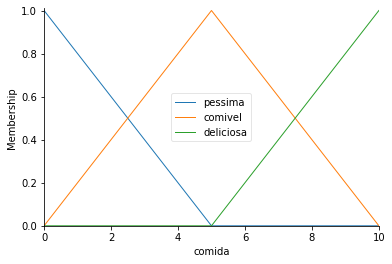

In [6]:
comida.view()

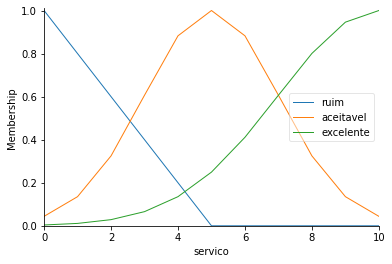

In [7]:
servico.view()

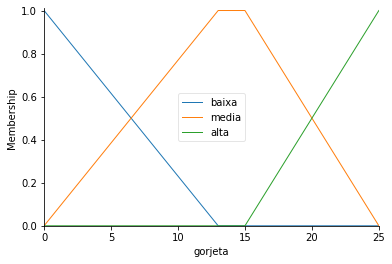

In [8]:
gorjeta.view()

## Criando as regras de decisão difusas

In [9]:
rule1 = ctrl.Rule(servico['excelente'] | comida['deliciosa'], gorjeta['alta'])
rule2 = ctrl.Rule(servico['aceitavel'], gorjeta['media'])
rule3 = ctrl.Rule(servico['ruim'] & comida['pessima'], gorjeta['baixa'])

## Criando e simulando um controlador nebuloso

In [10]:
gorjeta_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
gorjeta_simulador = ctrl.ControlSystemSimulation(gorjeta_ctrl)

# Entrando com alguns valores para qualidade da comida e do serviço
gorjeta_simulador.input['comida'] = 3.5
gorjeta_simulador.input['servico'] = 9.4

# Computando o resultado 
gorjeta_simulador.compute()
print(gorjeta_simulador.output['gorjeta'])


18.57604101547121


## Mostrando graficamente o resultado

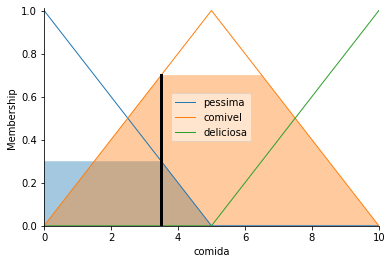

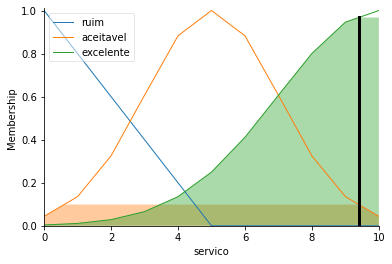

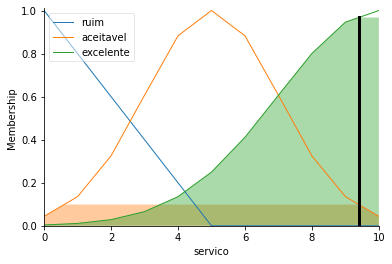

In [11]:
comida.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)
servico.view(sim=gorjeta_simulador)